## What is an Outlier?

Outlier is an observation that appears far away and diverges from an overall pattern in a sample.

### What are the types of Outliers?

Outlier can be of two types: Univariate and Multivariate.

### What causes Outliers?

Whenever we come across outliers, the ideal way to tackle them is to find out the reason of having these outliers. The method to deal with them would then depend on the reason of their occurrence. Causes of outliers can be classified in two broad categories:

    1. Artificial (Error) / Non-natural
    2. Natural.
    
#### Various types of outliers:
    1. Data Entry Errors
    2. Measurement Error
    3. Experimental Error
    4. Intentional Outlier
    5. Data Processing Error
    6. Sampling error
    7. Natural Outlier
    
### What is the impact of Outliers on a dataset?

Outliers can drastically change the results of the data analysis and statistical modeling. There are numerous unfavourable impacts of outliers in the data set:

        1. It increases the error variance and reduces the power of statistical tests
        2. If the outliers are non-randomly distributed, they can decrease normality
        3. They can bias or influence estimates that may be of substantive interest
        4. They can also impact the basic assumption of Regression, ANOVA and other statistical model assumptions.
        
### How to detect Outliers?

Most commonly used method to detect outliers is visualization. We use various visualization methods, like Box-plot, Histogram, Scatter Plot.

Also various thumb rules to detect outliers. Some of them are:

    1. Any value, which is beyond the range of -1.5 x IQR to 1.5 x IQR
    2. Use capping methods. Any value which out of range of 5th and 95th percentile can be considered as outlier
    3. Data points, three or more standard deviation away from mean are considered outlier
    4. Outlier detection is merely a special case of the examination of data for influential data points and it also depends on the business understanding
    5. Bivariate and multivariate outliers are typically measured using either an index of influence or leverage, or distance. Popular indices such as Mahalanobis’ distance and Cook’s D are frequently used to detect outliers.
    6. In SAS, we can use PROC Univariate, PROC SGPLOT. To identify outliers and influential observation, we also look at statistical measure like STUDENT, COOKD, RSTUDENT and others.
    
### How to remove Outliers?

Most of the ways to deal with outliers are similar to the methods of missing values like deleting observations, transforming them, binning them, treat them as a separate group, imputing values and other statistical methods.

### Which Machine LEarning Models Are Sensitive To Outliers?
        Naivye Bayes Classifier------------------------------ Not Sensitive
        SVM-------------------------------------------------- Not Sensitive
        Linear Regression------------------------------------ Sensitive 
        Logistic Regression---------------------------------- Sensitive 
        Decision Tree Regressor or Classifier---------------- Not Sensitive
        Ensemble(RF,XGboost,GB)------------------------------ Not Sensitive
        KNN-------------------------------------------------- Not Sensitive
        Kmeans----------------------------------------------- Sensitive
        Hierarichal------------------------------------------ Sensitive
        PCA-------------------------------------------------- Sensitive
        LDA-------------------------------------------------- Sensitive
        DBScan----------------------------------------------- Very Sensitive
        Neural Networks-------------------------------------- Sensitive

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\Harsh Jain\Desktop\HARSH JAIN\3. EVERYTHING RELATED TO DATA\DATA SCIENCE\DATASETS\titanic train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
import seaborn as sns

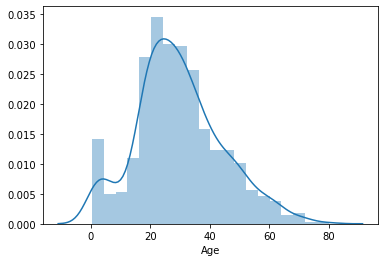

In [5]:
sns.distplot(df['Age'].dropna())

#### NOTE : IF THE DATA IS NORMALLY DISTRIBUTED AS ABOVE WE WILL APPLY "EXTREME VALUE ANALYSIS" TECHNIQUE

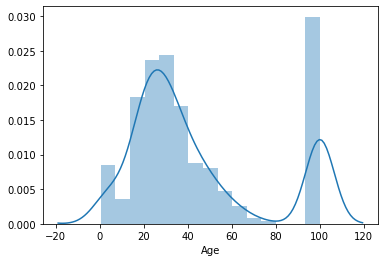

In [6]:
sns.distplot(df['Age'].fillna(100))

Text(0, 0.5, 'No of Passengers')

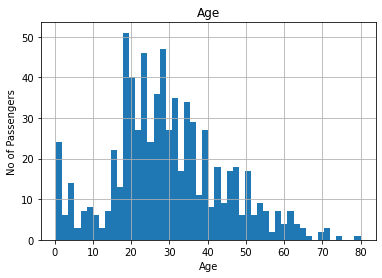

In [7]:
#### THE AGE DATA IS GAUSSIAN DISTRIBUTED.

figure = df.Age.hist(bins=50)
figure.set_title("Age")
figure.set_xlabel('Age')
figure.set_ylabel('No of Passengers')

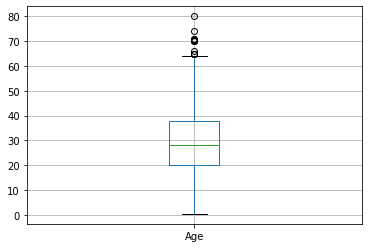

In [8]:
## FIND THE OUTLIERS USING BOXPLOT:

figure = df.boxplot(column= "Age")

In [9]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

#### ASSUMING THE AGE FOLLOWS NORMAL/GAUSSIAN DISTRIBUTION WE WILL CALCULATE THE BOUNDARIES WHICH DIFFERENTIATE THE OUTLIERS:

In [10]:
uppper_boundary=df['Age'].mean() + 3* df['Age'].std()
lower_boundary=df['Age'].mean() - 3* df['Age'].std()
print(lower_boundary), print(uppper_boundary),print(df['Age'].mean())

-13.88037434994331
73.27860964406095
29.69911764705882


(None, None, None)

#### IF FEATURES ARE SKEWED WE USE THE BELOW TECHNIQUE:

Text(0, 0.5, 'No of passenger')

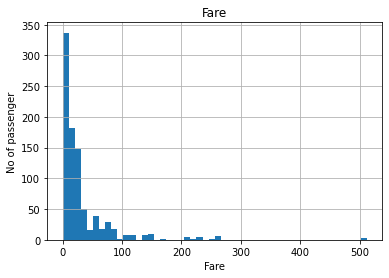

In [11]:
figure=df.Fare.hist(bins=50)
figure.set_title('Fare')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

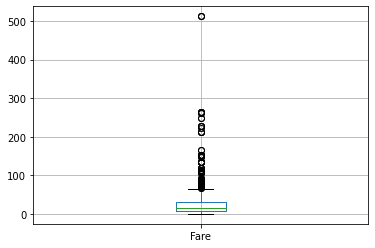

In [19]:
df.boxplot(column="Fare")

In [20]:
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [22]:
#### Lets compute the Interquantile range to calculate the boundaries
#### we compute IQR, LOWER,UPPER__BRIDGE ONLY IF THE DATA IS SKEWED NOT WHEN THE DATA IS GUAASIAN DISTRIBUTED.

IQR=df.Fare.quantile(0.75)-df.Fare.quantile(0.25)
IQR

23.0896

In [24]:
lower_bridge=df['Fare'].quantile(0.25)-(IQR*1.5)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*1.5)
print(lower_bridge), print(upper_bridge)

-26.724
65.6344


(None, None)

In [25]:
#### TO GET Extreme outliers:

lower_bridge=df['Fare'].quantile(0.25)-(IQR*3)
upper_bridge=df['Fare'].quantile(0.75)+(IQR*3)
print(lower_bridge), print(upper_bridge)

-61.358399999999996
100.2688


(None, None)

In [26]:
data=df.copy()

In [27]:
data.loc[data['Age']>=73,'Age']=73

In [28]:
data.loc[data['Fare']>=100,'Fare']=100

Text(0, 0.5, 'No of passenger')

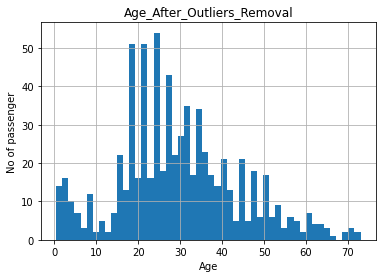

In [29]:
figure=data.Age.hist(bins=50)
figure.set_title('Age_After_Outliers_Removal')
figure.set_xlabel('Age')
figure.set_ylabel('No of passenger')

Text(0, 0.5, 'No of passenger')

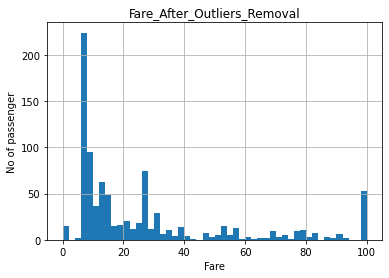

In [30]:
figure=data.Fare.hist(bins=50)
figure.set_title('Fare_After_Outliers_Removal')
figure.set_xlabel('Fare')
figure.set_ylabel('No of passenger')

### APPLY SOME MODEL - WE'LL APPLY LOGISTIC REGRESSION:

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data[['Age','Fare']].fillna(0),data['Survived'],test_size=0.3)

In [32]:
### Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
y_pred1=classifier.predict_proba(X_test)

from sklearn.metrics import accuracy_score,roc_auc_score
print("Accuracy_score: {}".format(accuracy_score(y_test,y_pred)))
print("roc_auc_score: {}".format(roc_auc_score(y_test,y_pred1[:,1])))

Accuracy_score: 0.6940298507462687
roc_auc_score: 0.6716644936983921
